# Predicting jaundice disease using Machine Learning

In [1]:
# Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#We want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve,plot_roc_curve

#Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

#Pandas-Profiling helps to build a widget that can be used to better visualise it
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
 
%matplotlib inline

### Importing the dataset

In [2]:
df=pd.read_csv('../Datasets/jaundice_dataset.csv')

### Shape of the dataset (Rows, Columns)

In [3]:
df.shape

(583, 9)

### Head of the dataset

In [4]:
df.head()

AGE  GENDER  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       1              0.7               0.1                   187   
1   62       0             10.9               5.5                   699   
2   62       0              7.3               4.1                   490   
3   58       0              1.0               0.4                   182   
4   72       0              3.9               2.0                   195   

   Alamine_Aminotransferase  Total_Protiens  Albumin  jaundice  
0                        16             6.8      3.3         1  
1                        64             7.5      3.2         1  
2                        60             7.0      3.3         1  
3                        14             6.8      3.4         1  
4                        27             7.3      2.4         1

<br><br>
# Exploratory Data analysis
<br>

### Renaming columns

In [5]:
df.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','slope':'ST_slope','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_disease'}, inplace = True)

In [6]:
# View of the Renamed Dataframe
df.head()

AGE  GENDER  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       1              0.7               0.1                   187   
1   62       0             10.9               5.5                   699   
2   62       0              7.3               4.1                   490   
3   58       0              1.0               0.4                   182   
4   72       0              3.9               2.0                   195   

   Alamine_Aminotransferase  Total_Protiens  Albumin  jaundice  
0                        16             6.8      3.3         1  
1                        64             7.5      3.2         1  
2                        60             7.0      3.3         1  
3                        14             6.8      3.4         1  
4                        27             7.3      2.4         1

### Information about the data

In [7]:
list(df.columns.values)

['AGE',
 'GENDER',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'jaundice']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AGE                       583 non-null    int64  
 1   GENDER                    583 non-null    int64  
 2   Total_Bilirubin           583 non-null    float64
 3   Direct_Bilirubin          583 non-null    float64
 4   Alkaline_Phosphotase      583 non-null    int64  
 5   Alamine_Aminotransferase  583 non-null    int64  
 6   Total_Protiens            583 non-null    float64
 7   Albumin                   583 non-null    float64
 8   jaundice                  583 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 41.1 KB


### Description about the dataset

In [9]:
df.describe()

AGE      GENDER  Total_Bilirubin  Direct_Bilirubin  \
count  583.000000  583.000000       583.000000        583.000000   
mean    44.746141    0.243568         3.298799          1.486106   
std     16.189833    0.429603         6.209522          2.808498   
min      4.000000    0.000000         0.400000          0.100000   
25%     33.000000    0.000000         0.800000          0.200000   
50%     45.000000    0.000000         1.000000          0.300000   
75%     58.000000    0.000000         2.600000          1.300000   
max     90.000000    1.000000        75.000000         19.700000   

       Alkaline_Phosphotase  Alamine_Aminotransferase  Total_Protiens  \
count            583.000000                583.000000      583.000000   
mean             290.576329                 80.713551        6.483190   
std              242.937989                182.620356        1.085451   
min               63.000000                 10.000000        2.700000   
25%              175.500000                 23.000000        5.800000   
50%              208.000000                 35.000000        6.600000   
75%              298.000000                 60.500000        7.200000   
max             2110.000000               2000.000000        9.600000   

          Albumin    jaundice  
count  583.000000  583.000000  
mean     3.141852    1.286449  
std      0.795519    0.452490  
min      0.900000    1.000000  
25%      2.600000    1.000000  
50%      3.100000    1.000000  
75%      3.800000    2.000000  
max      5.500000    2.000000

### Are there any missing values?

In [10]:
df.isna().sum() 

AGE                         0
GENDER                      0
Total_Bilirubin             0
Direct_Bilirubin            0
Alkaline_Phosphotase        0
Alamine_Aminotransferase    0
Total_Protiens              0
Albumin                     0
jaundice                    0
dtype: int64

### Correlation matrix & Matrix Visualisation

In [11]:
df.corr()

AGE    GENDER  Total_Bilirubin  \
AGE                       1.000000 -0.056560         0.011763   
GENDER                   -0.056560  1.000000        -0.089291   
Total_Bilirubin           0.011763 -0.089291         1.000000   
Direct_Bilirubin          0.007529 -0.100436         0.874618   
Alkaline_Phosphotase      0.080425  0.027496         0.206669   
Alamine_Aminotransferase -0.086883 -0.082332         0.214065   
Total_Protiens           -0.187461  0.089121        -0.008099   
Albumin                  -0.265924  0.093799        -0.222250   
jaundice                 -0.137351  0.082416        -0.220208   

                          Direct_Bilirubin  Alkaline_Phosphotase  \
AGE                               0.007529              0.080425   
GENDER                           -0.100436              0.027496   
Total_Bilirubin                   0.874618              0.206669   
Direct_Bilirubin                  1.000000              0.234939   
Alkaline_Phosphotase              0.234939              1.000000   
Alamine_Aminotransferase          0.233894              0.125680   
Total_Protiens                   -0.000139             -0.028514   
Albumin                          -0.228531             -0.165453   
jaundice                         -0.246046             -0.184866   

                          Alamine_Aminotransferase  Total_Protiens   Albumin  \
AGE                                      -0.086883       -0.187461 -0.265924   
GENDER                                   -0.082332        0.089121  0.093799   
Total_Bilirubin                           0.214065       -0.008099 -0.222250   
Direct_Bilirubin                          0.233894       -0.000139 -0.228531   
Alkaline_Phosphotase                      0.125680       -0.028514 -0.165453   
Alamine_Aminotransferase                  1.000000       -0.042518 -0.029742   
Total_Protiens                           -0.042518        1.000000  0.784053   
Albumin                                  -0.029742        0.784053  1.000000   
jaundice                                 -0.163416        0.035008  0.161388   

                          jaundice  
AGE                      -0.137351  
GENDER                    0.082416  
Total_Bilirubin          -0.220208  
Direct_Bilirubin         -0.246046  
Alkaline_Phosphotase     -0.184866  
Alamine_Aminotransferase -0.163416  
Total_Protiens            0.035008  
Albumin                   0.161388  
jaundice                  1.000000

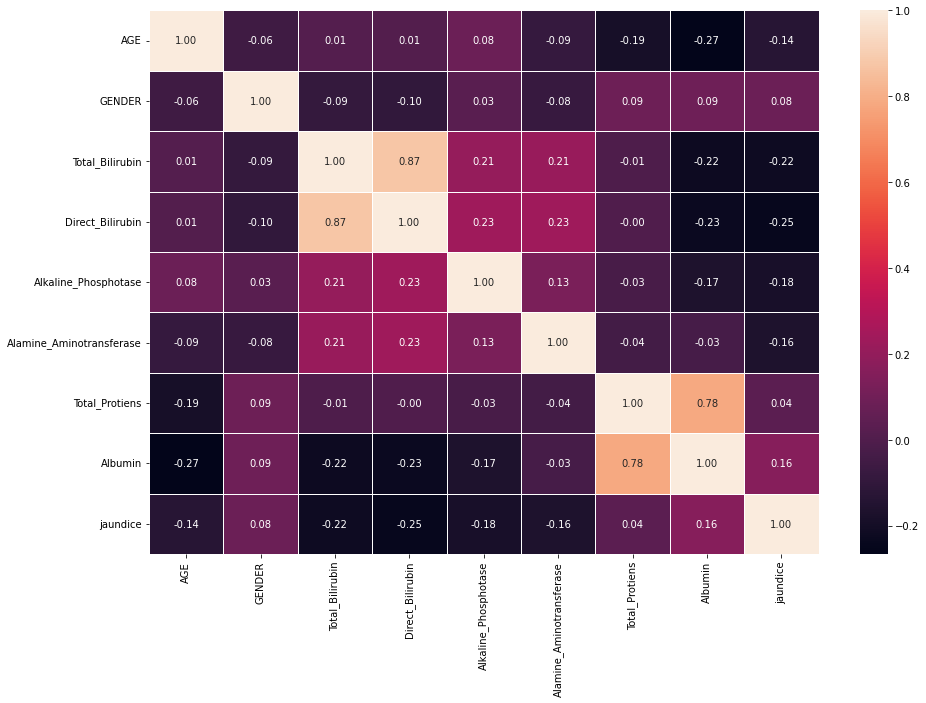

In [12]:
# Let's make our correlation matrix visual
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

### Split data using Train-Test Split

In [13]:
X=df.drop(['jaundice'],axis=1)
y=df['jaundice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

<br>
Now we have got our data split into training and test sets, it is time to build a Machine Learning model.

We will train it (find the patterns) on the training set.

And we will test it (use the patterns) on the test set.

**We're going to try 3 different Machine Learning models:**
1. Logistic Regression

2. K-Nearest Neighbours Classifier

3. Random Forest Classifier

## 1. Logistic Regression

In [14]:
lr=LogisticRegression()

In [15]:
lr.fit(X_train,y_train)

LogisticRegression()

In [16]:
#Training score

lr.score(X_train,y_train)

0.7188841201716738

In [17]:
#Prediction of the test variable


lr_y_preds=lr.predict(X_test)

In [18]:
#Testing accuracy

lr.score(X_test,y_test)

0.7521367521367521

### Confusion Matrix

In [19]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")


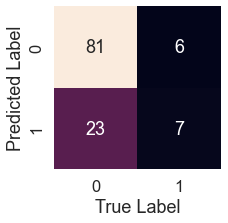

In [20]:
plot_conf_mat(y_test,lr_y_preds)

### Classification Report

In [21]:
print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           1       0.78      0.93      0.85        87
           2       0.54      0.23      0.33        30

    accuracy                           0.75       117
   macro avg       0.66      0.58      0.59       117
weighted avg       0.72      0.75      0.71       117



## 2. K-Nearest Neighbour

In [22]:
knn=KNeighborsClassifier()

In [23]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [24]:
#Training score

knn.score(X_train,y_train)

0.776824034334764

In [25]:
#Prediction of the test variable

knn_y_preds=knn.predict(X_test)

In [26]:
#Testing accuracy

knn.score(X_test,y_test)

0.7094017094017094

### Confusion Matrix

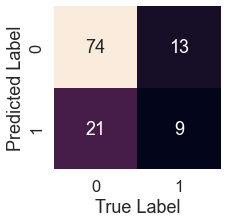

In [27]:
plot_conf_mat(y_test,knn_y_preds)

### Classification Report

In [28]:
print(classification_report(y_test,knn_y_preds))

              precision    recall  f1-score   support

           1       0.78      0.85      0.81        87
           2       0.41      0.30      0.35        30

    accuracy                           0.71       117
   macro avg       0.59      0.58      0.58       117
weighted avg       0.68      0.71      0.69       117



## 3. Random Forest

In [29]:
rf=RandomForestClassifier()

In [30]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
#Training score

rf.score(X_train,y_train)

1.0

In [32]:
#Prediction of the test variable

rf_y_preds=rf.predict(X_test)

In [33]:
#Testing accuracy

rf.score(X_test,y_test)

0.7521367521367521

### Confusion Matrix

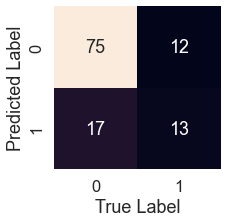

In [34]:
plot_conf_mat(y_test,rf_y_preds)

### Classification Report

In [35]:
print(classification_report(y_test,rf_y_preds))

              precision    recall  f1-score   support

           1       0.82      0.86      0.84        87
           2       0.52      0.43      0.47        30

    accuracy                           0.75       117
   macro avg       0.67      0.65      0.66       117
weighted avg       0.74      0.75      0.74       117



In [36]:
svm = SVC()


In [37]:
svm.fit(X_train,y_train)

SVC()

In [38]:

svm.score(X_train,y_train)

0.7060085836909872

In [39]:
preds=svm.predict(X_test)
svm.score(X_test,y_test)

0.7435897435897436

In [40]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN':knn.score(X_test,y_test),
             'Random Forest':rf.score(X_test,y_test),
             'svm':svm.score(X_test,y_test)}

In [41]:
model_scores

{'Logistic Regression': 0.7521367521367521,
 'KNN': 0.7094017094017094,
 'Random Forest': 0.7521367521367521,
 'svm': 0.7435897435897436}

## Model Comparison

In [42]:
#Based on accuracy
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

Logistic Regression       KNN  Random Forest      svm
accuracy             0.752137  0.709402       0.752137  0.74359

In [43]:
import pickle
filename = 'jaundice.sav'
#pickle.dump(lr, open(filename, 'wb'))
  